<a href="https://colab.research.google.com/github/shivamm007/EDA---Hotel_Bookings/blob/main/Hotel_Booking_Analysis_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
#importing python librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#connecting google colab to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#loading the dataset in colab using pandas
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone project/Hotel Bookings.csv")

In [4]:
#Let's have a look on Dataset
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [7]:
#Getting total number to rows and columns of dataset
df.shape

(119390, 32)

In [8]:
#Checking which columns have nul values using function info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
#Printing list of columns
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [10]:
#Getting datatype of data in each column
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Getting Number of enteries of each Hotel Type

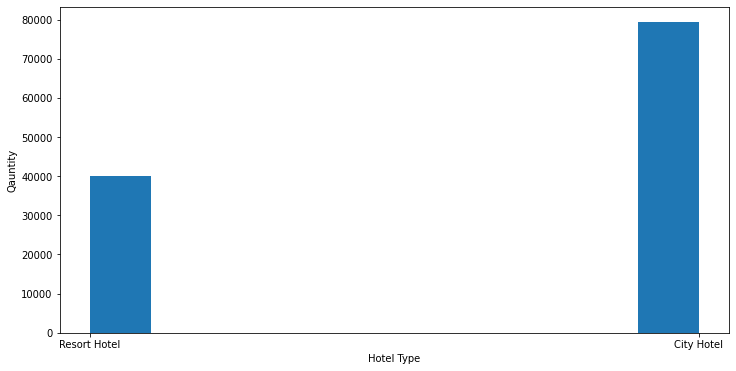

In [7]:
fig, ax = plt.subplots(figsize =(12,6) )
ax.hist(df['hotel'])
ax.set_xlabel('Hotel Type')
ax.set_ylabel('Qauntity')
plt.show()

Removing Unnecessary Columns

In [18]:
df = df.drop(columns = ['arrival_date_year','agent','company','reservation_status_date'])
df.shape
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


Checking and Removing Duplicate Data

In [22]:
duplicate_rows_df = df[df.duplicated()]
#Number of duplicate rows
duplicate_rows_df.shape 

(0, 28)

In [23]:
#dropping duplicates
df = df.drop_duplicates()
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [24]:
df.count()

hotel                             87123
is_canceled                       87123
lead_time                         87123
arrival_date_month                87123
arrival_date_week_number          87123
arrival_date_day_of_month         87123
stays_in_weekend_nights           87123
stays_in_week_nights              87123
adults                            87123
children                          87119
babies                            87123
meal                              87123
country                           86672
market_segment                    87123
distribution_channel              87123
is_repeated_guest                 87123
previous_cancellations            87123
previous_bookings_not_canceled    87123
reserved_room_type                87123
assigned_room_type                87123
booking_changes                   87123
deposit_type                      87123
days_in_waiting_list              87123
customer_type                     87123
adr                               87123


In [25]:
#finding null values
print(df.isnull().sum())

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           451
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_spe

In [26]:
#Dropping null values
df.dropna()
df.count()

hotel                             87123
is_canceled                       87123
lead_time                         87123
arrival_date_month                87123
arrival_date_week_number          87123
arrival_date_day_of_month         87123
stays_in_weekend_nights           87123
stays_in_week_nights              87123
adults                            87123
children                          87119
babies                            87123
meal                              87123
country                           86672
market_segment                    87123
distribution_channel              87123
is_repeated_guest                 87123
previous_cancellations            87123
previous_bookings_not_canceled    87123
reserved_room_type                87123
assigned_room_type                87123
booking_changes                   87123
deposit_type                      87123
days_in_waiting_list              87123
customer_type                     87123
adr                               87123


In [27]:
#checking again for null values
print(df.isnull().sum())

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           451
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_spe

In [31]:
df.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87119.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000
mean,0.272879,79.729601,26.836266,15.815376,1.005441,2.625495,1.875842,0.138879,0.010835,0.039186,0.030233,0.184567,0.272270,0.731885,106.366713,0.084490,0.699907
std,0.445442,85.941448,13.674562,8.835234,1.031579,2.051753,0.626833,0.456248,0.113674,0.194038,0.369369,1.734574,0.727994,9.866000,55.044371,0.281934,0.832228
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


Checking Number of Entries for each Hotel type

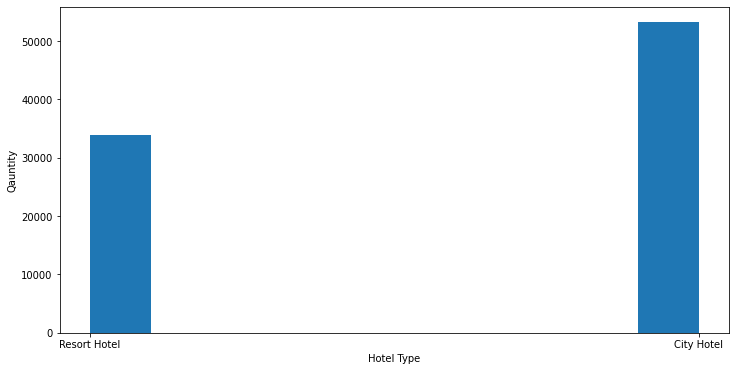

In [34]:
#plotting graph of each hotel type entries after removing null and duplicate values from dataset
fig, ax = plt.subplots(figsize =(12,6) )
ax.hist(df['hotel'])
ax.set_xlabel('Hotel Type')
ax.set_ylabel('Qauntity')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 1440x1080 with 0 Axes>

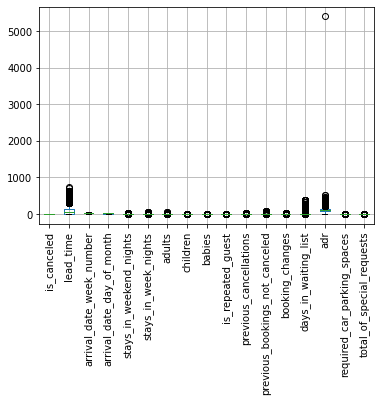

<Figure size 1440x1080 with 0 Axes>

In [35]:
df.boxplot()
plt.xticks(rotation=90)
plt.figure(figsize=(20,15))

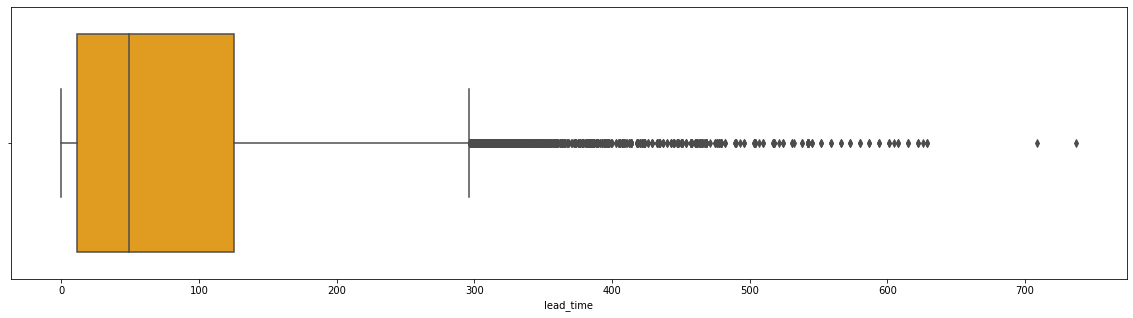

In [36]:
#plotting boxplot to find outliners
#plot for lead time variable
plt.figure(figsize=(20,5))
sns.boxplot(x=df['lead_time'],color='orange')

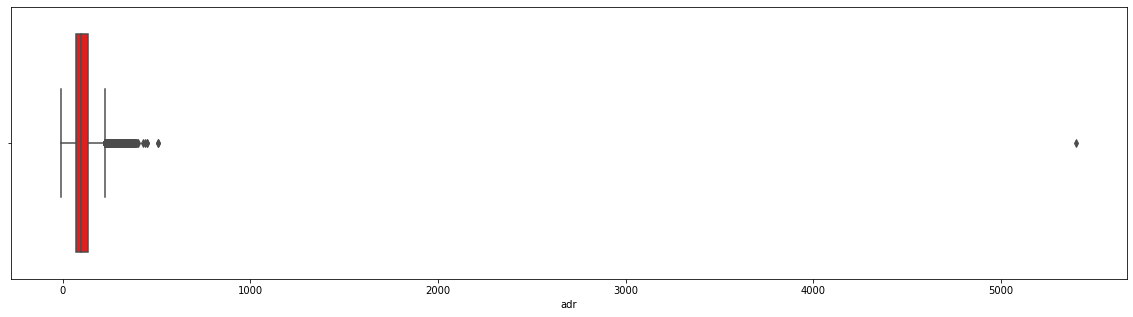

In [37]:
#plotting boxplot to find outliners
#plot for adr variable
plt.figure(figsize=(20,5))
sns.boxplot(x=df['adr'],color='red')

In [38]:
#dropping outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
print('\nInternalQuartileRange = \n',IQR)


InternalQuartileRange = 
 is_canceled                         1.0
lead_time                         114.0
arrival_date_week_number           21.0
arrival_date_day_of_month          15.0
stays_in_weekend_nights             2.0
stays_in_week_nights                3.0
adults                              0.0
children                            0.0
babies                              0.0
is_repeated_guest                   0.0
previous_cancellations              0.0
previous_bookings_not_canceled      0.0
booking_changes                     0.0
days_in_waiting_list                0.0
adr                                62.0
required_car_parking_spaces         0.0
total_of_special_requests           1.0
dtype: float64


**Data** **Visualization**

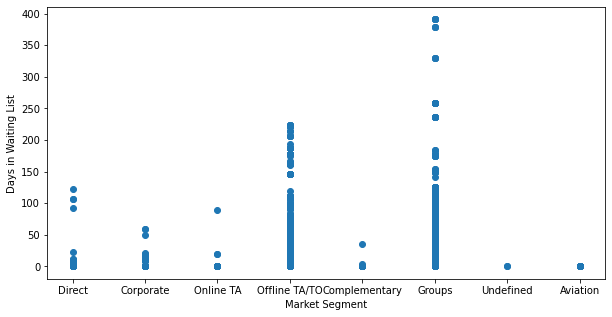

In [39]:
#Plotting scatterplot graph for market segment and days in waiting list 
fig, ax = plt.subplots(figsize = (10,5))
#plt.subplots() returns tuple containing a figure and axes object.
ax.scatter(df['market_segment'], df['days_in_waiting_list'])
ax.set_xlabel('Market Segment')
ax.set_ylabel('Days in Waiting List')
plt.show()

In [10]:
#Getting best month for visiting 
grp = df.groupby('arrival_date_month')
a = grp['lead_time'].agg(np.mean)
b = grp['stays_in_week_nights'].agg(np.mean)
c = grp['stays_in_weekend_nights'].agg(np.mean)
d = grp['booking_changes'].agg(np.sum)
e = grp['days_in_waiting_list'].agg(np.sum)
f = grp['adr'].agg(np.mean)
g = grp['hotel'].agg(np.sum)
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)

arrival_date_month
April         94.822888
August       121.137710
December      73.561357
February      47.859569
January       45.310002
July         136.322565
June         128.247280
March         70.119257
May          117.646171
November      76.580807
October      122.994624
September    136.675200
Name: lead_time, dtype: float64
arrival_date_month
April        2.418162
August       2.836420
December     2.357522
February     2.177987
January      2.192107
July         2.805545
June         2.655453
March        2.560649
May          2.406921
November     2.404033
October      2.230735
September    2.524362
Name: stays_in_week_nights, dtype: float64
arrival_date_month
April        0.948688
August       1.060460
December     0.865044
February     0.853123
January      0.779389
July         1.120291
June         0.920377
March        0.858689
May          0.869646
November     0.785105
October      0.895341
September    0.942044
Name: stays_in_weekend_nights, dtype: float64
arriva

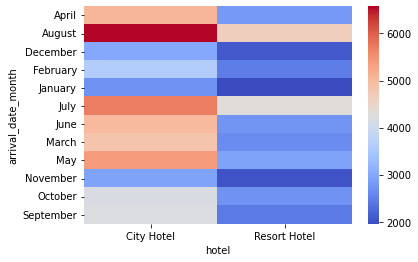

In [44]:
#plotting Heatmap to get which months are most likely to visit
sns.heatmap(pd.crosstab(df.arrival_date_month,df.hotel),cmap='coolwarm')

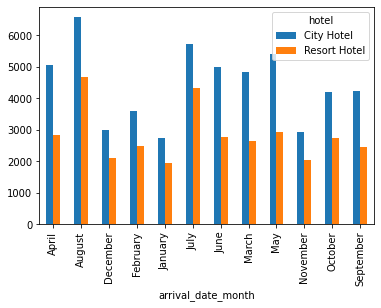

In [45]:
# Now checking number of bookings in each month for both hotel types
df1 = df.groupby(['arrival_date_month','hotel']).size()
df1 = df1.unstack()
df1.plot(kind='bar')

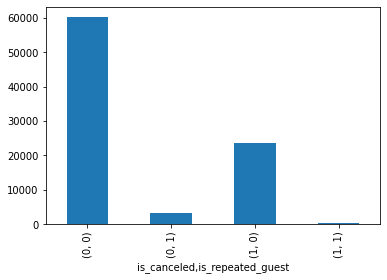

In [46]:
#checking whether the booking is cancelled and the guest is repeated or not
df2 = df.groupby(['is_canceled','is_repeated_guest']).size()
df2.plot(kind='bar')

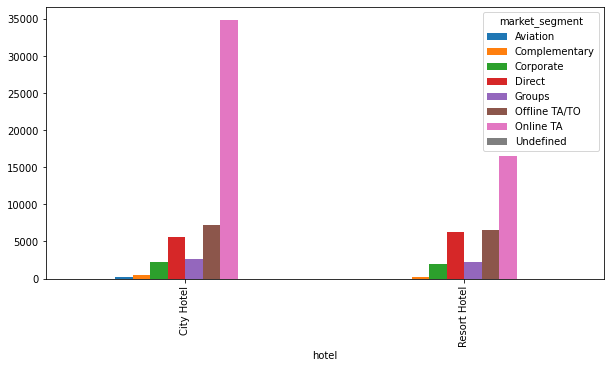

In [47]:
df3 = df.groupby(['hotel','market_segment']).size()
df3 = df3.unstack()
df3.plot(kind='bar',figsize = (10,5))

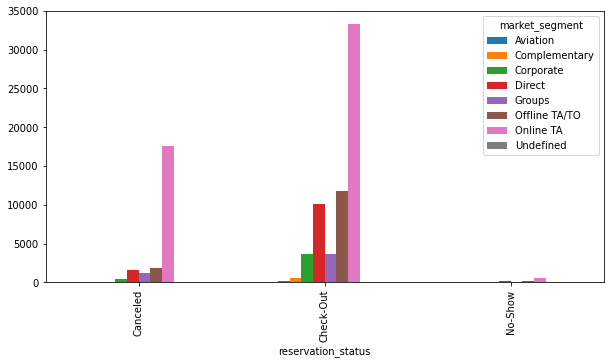

In [48]:
df4 = df.groupby(['reservation_status','market_segment']).size()
df4 = df4.unstack()
df4.plot(kind='bar',figsize = (10,5))

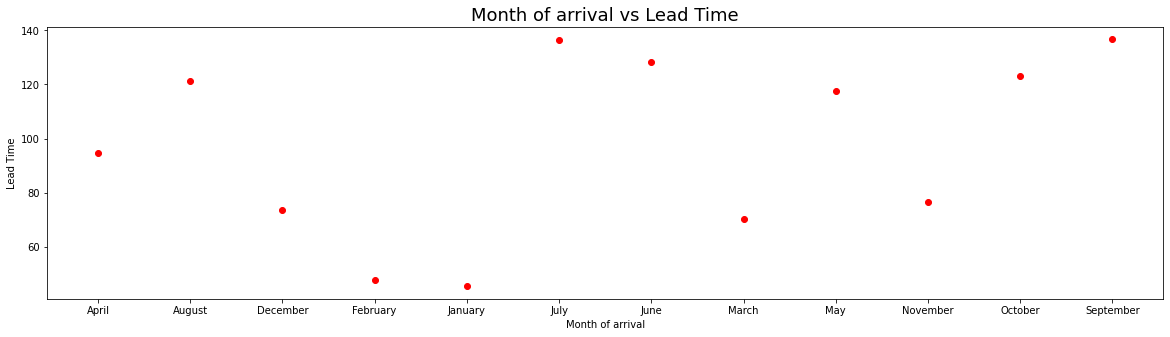

In [11]:
plt.figure(figsize=(20,5))
plt.plot(a,'ro',color='red')
plt.title('Month of arrival vs Lead Time',fontsize=18)
plt.xlabel('Month of arrival')
plt.ylabel('Lead Time')
plt.show()